In [53]:
from calc import Exp
import pickle
import numpy as np
import seaborn as sns
from glob import glob
import json
import matplotlib.pyplot as plt
from collections import defaultdict

In [54]:
conv = defaultdict(list)
not_conv = defaultdict(list)
boom = defaultdict(list)


for i in glob('q01_snd_data/*'):
    try:
        j = int(i.split('_')[-1])
        with open(i, 'rb') as inp:
            a = pickle.load(inp)
        if a.eps != 0.00001:
            continue
        if a.converged != 'boom':
            conv[(a.q, a.du)].append(a)
        elif a.converged == 'boom':
            boom[(a.q, a.du)].append(a)      
    except:
        pass

In [55]:
def u(exp):
    return 1
def v(exp):
    return 1
def f_u(exp):
    return - v(exp)
def f_v(exp):
    return - u(exp)
def g_u(exp):
    return exp.p*v(exp)
def g_v(exp):
    return exp.p*(u(exp) - (exp.q*(exp.q+1))/(exp.q+v(exp))**2)

def calc_ks(exp):
    a = exp.du*exp.dv
    b =  - (exp.dv*f_u(exp) + exp.du*g_v(exp))
    c = f_u(exp)*g_v(exp) - f_v(exp)*g_u(exp)
    d = b**2 -4*a*c
    k0 = (-b - np.sqrt(d)) / (2*a)    
    k1 = (-b + np.sqrt(d)) / (2*a)
    return k0, k1

Text(189.72222222222223, 0.5, '$q$')

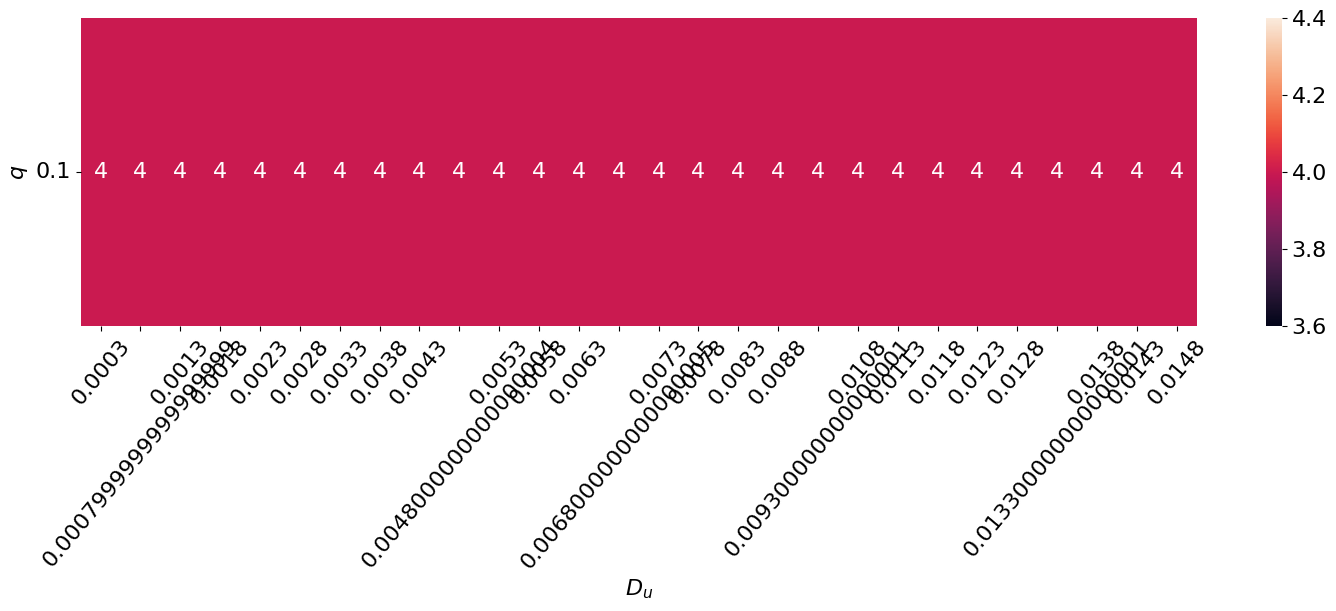

In [56]:
qs = sorted(set(k[0] for k in conv))
dus = sorted(set(k[1] for k in conv))

res = np.zeros((len(qs), len(dus)))

for q,du in conv: 
    res[ qs.index(q), dus.index(du)] += len(conv[(q,du)])
plt.figure(figsize=(18,4))
ax = sns.heatmap(res, annot=True)
_ = ax.set_xticklabels(dus, rotation=50)
ax.set_xlabel('$D_u$')
ax.invert_yaxis()
_ = ax.set_yticklabels(qs, rotation=0)
ax.set_ylabel('$q$')

In [57]:
def draw_for_q(q):
    plt.rcParams['font.size'] = 16
    for k in sorted(conv):
        print(k[0])
        if k[0]==q:
            fig, axes = plt.subplots(1,4, figsize=(25,5))
            for ax, exp in zip(axes, conv[k][:5]):

                s = exp.process_U[-1]
                ax = sns.heatmap(s, cmap='nipy_spectral', ax=ax)
                
                x,y = s.shape
                ticks = np.linspace(0,x - 1,11).round()
                ax.set_xticks(ticks)
                ax.set_xticklabels((ticks*exp.dx).round(2))
                ax.set_yticks(ticks)
                ax.set_yticklabels((ticks*exp.dx).round(2))
                ax.invert_yaxis()
                k0, k1 = calc_ks(exp)
            fig.suptitle(f'q = {exp.q}, $D_u$ = {round(exp.du,5)}, p = {exp.p}, $D_v$={exp.dv}, eps={exp.eps}, t_max={exp.process_U.shape[0]*exp.save_every_n_steps*exp.dt}, ${k0/np.pi**2} < k_x^2 + k_y^2 < {k1/np.pi**2}$')
            plt.show()

def draw_for_q_single(q):
    plt.rcParams['font.size'] = 16
    keys = [k for k in conv if k[0]==q]
    fig, axes = plt.subplots(1,4, figsize=(5*len(keys),5))
    for ax, k in zip(axes, keys):
        du = k[1]
        exp = conv[k][0]
        s = exp.process_U[-1]
        ax = sns.heatmap(s, cmap='jet', ax=ax)    
        x,y = s.shape
        ticks = np.linspace(0,x - 1,11).round()
        ax.set_xticks(ticks)
        ax.set_xticklabels((ticks*exp.dx).round(2))
        ax.set_yticks(ticks)
        ax.set_yticklabels((ticks*exp.dx).round(2))
        ax.invert_yaxis()
        ax.set_title(f'$D_u$ = {du}, eps={exp.eps}')
    fig.suptitle(f'q = {exp.q}, p = {exp.p}, $D_v$={exp.dv}')
    plt.show()

0.1


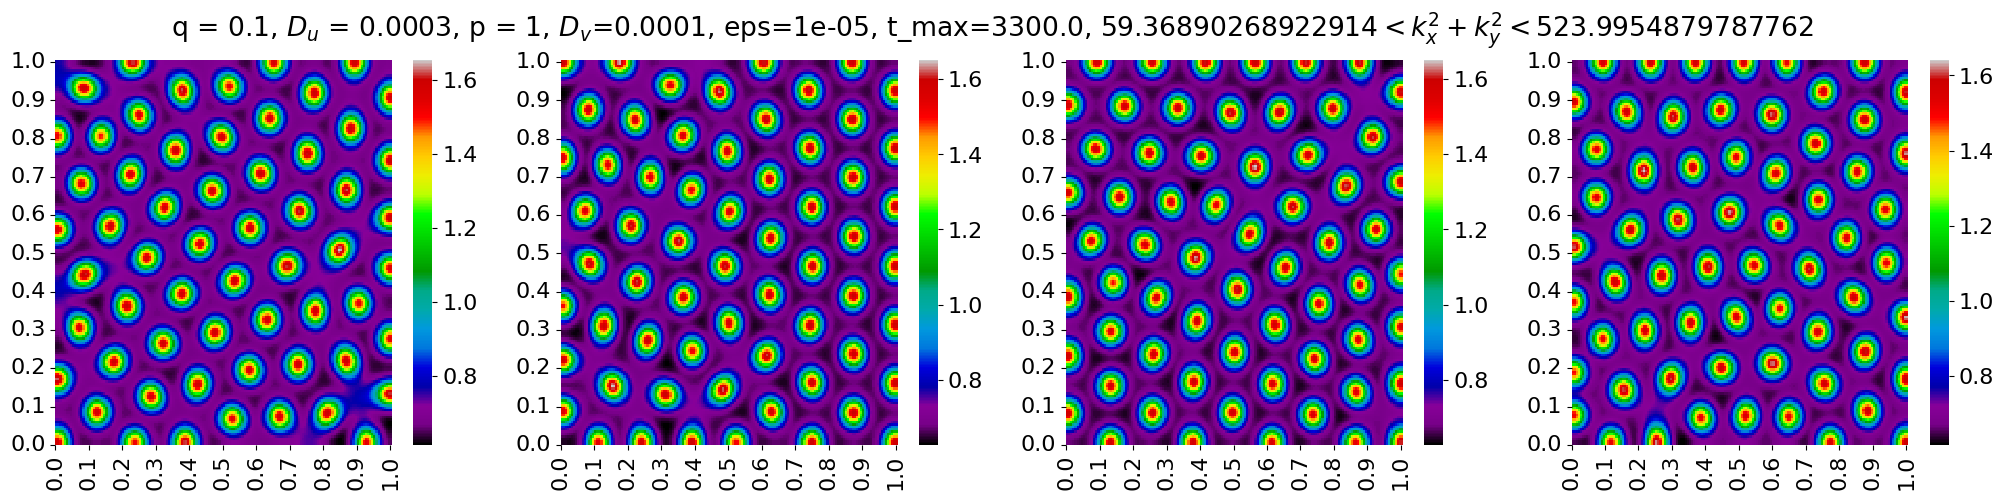

0.1


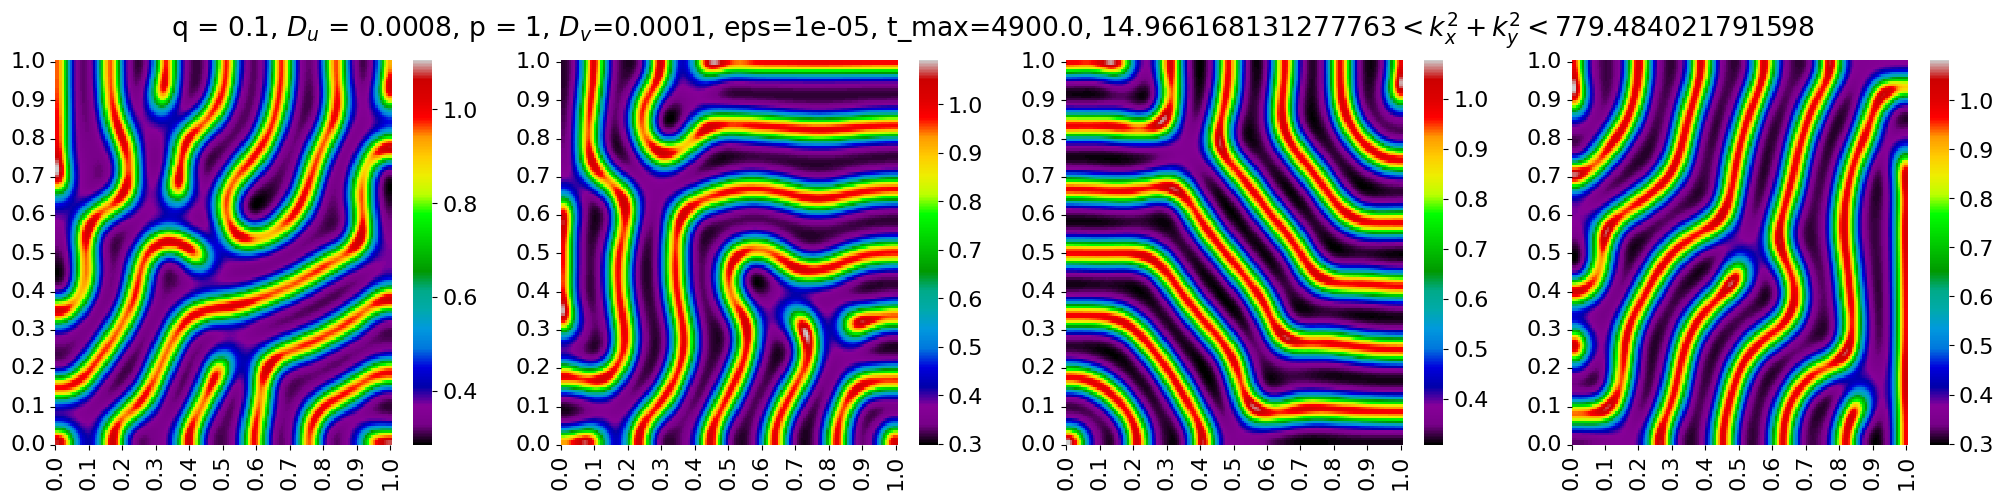

0.1


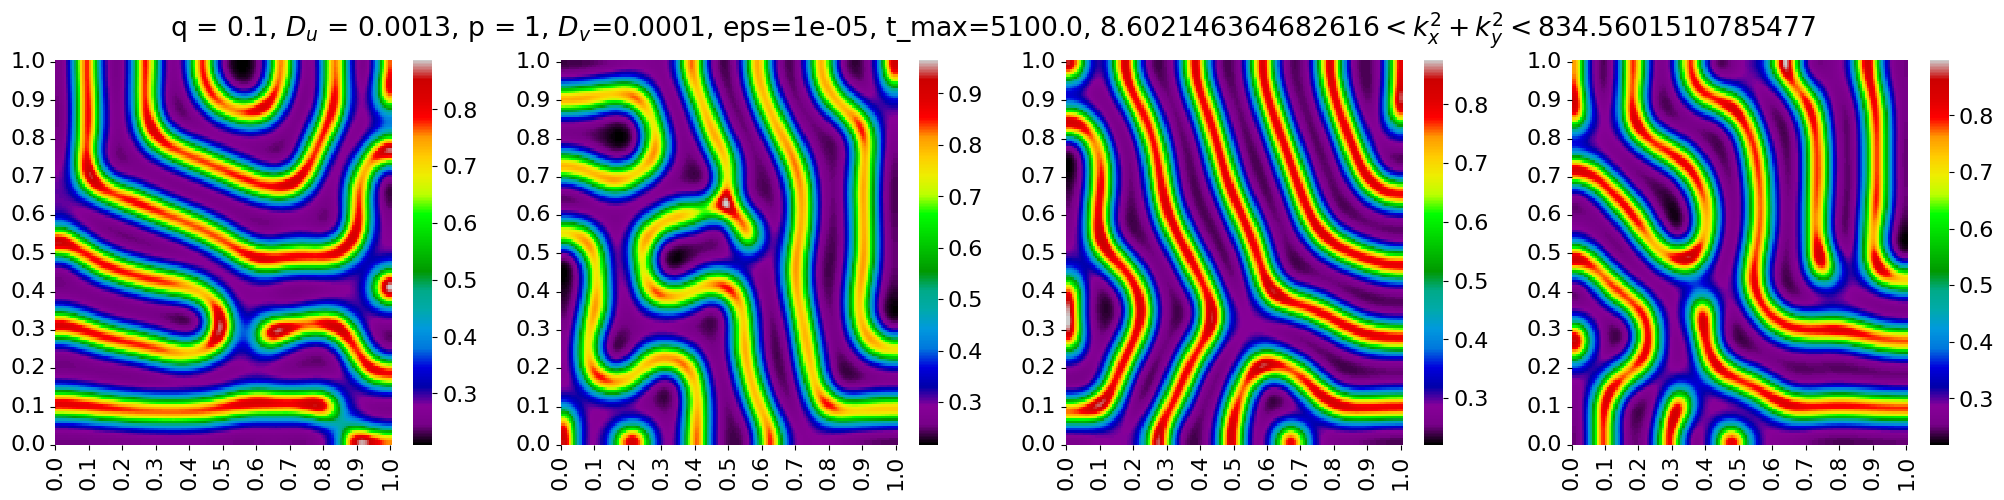

0.1


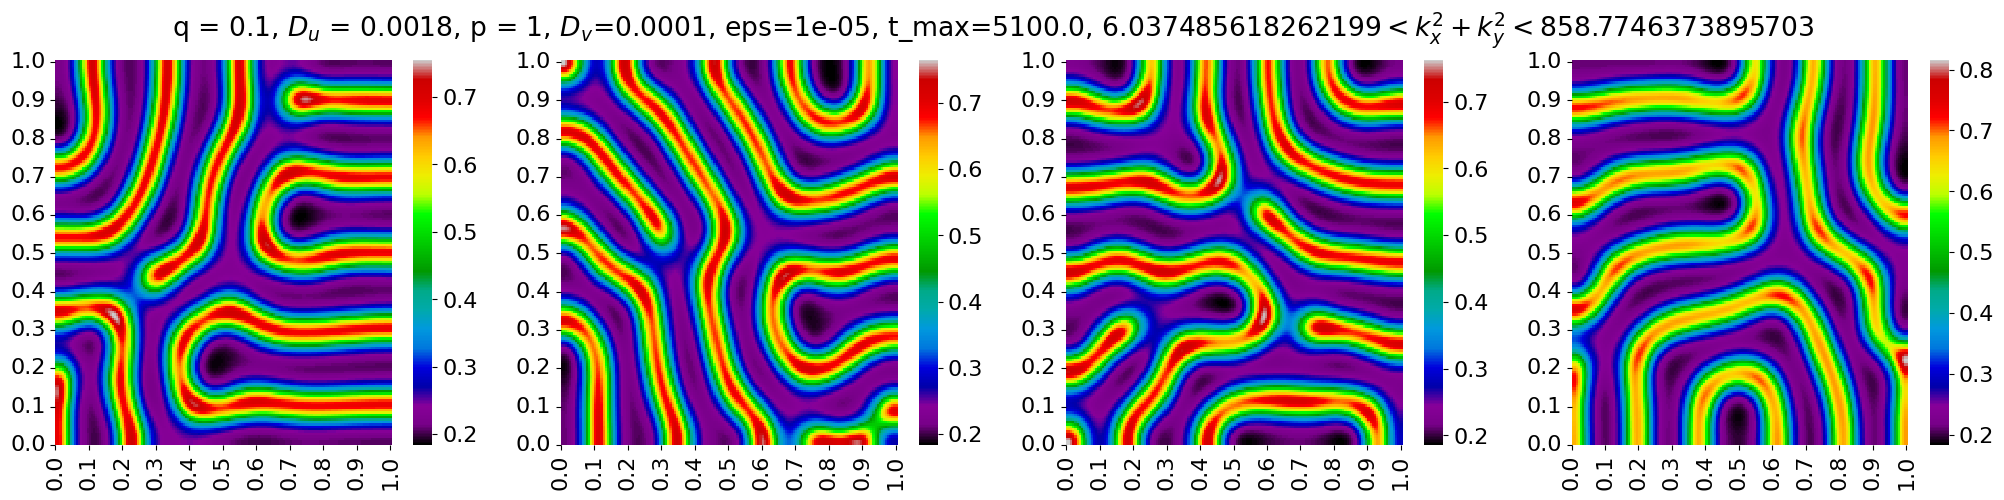

0.1


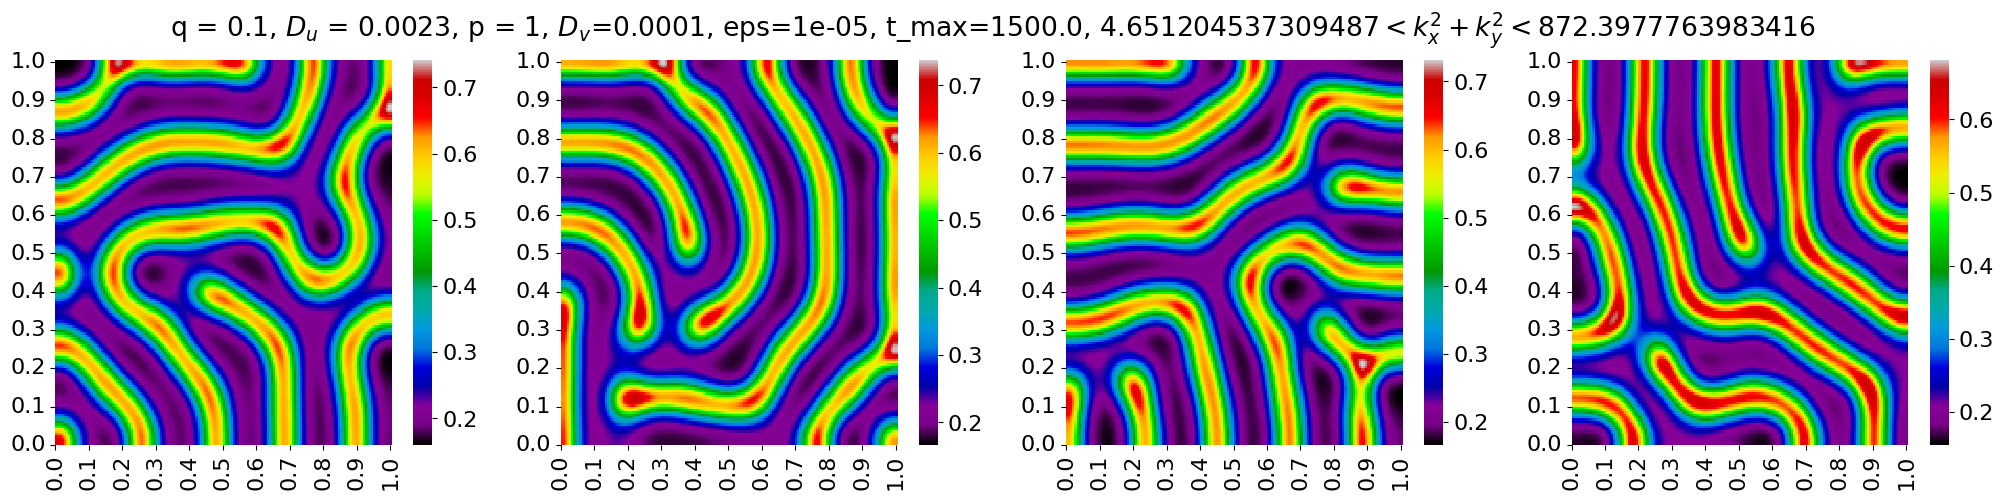

0.1


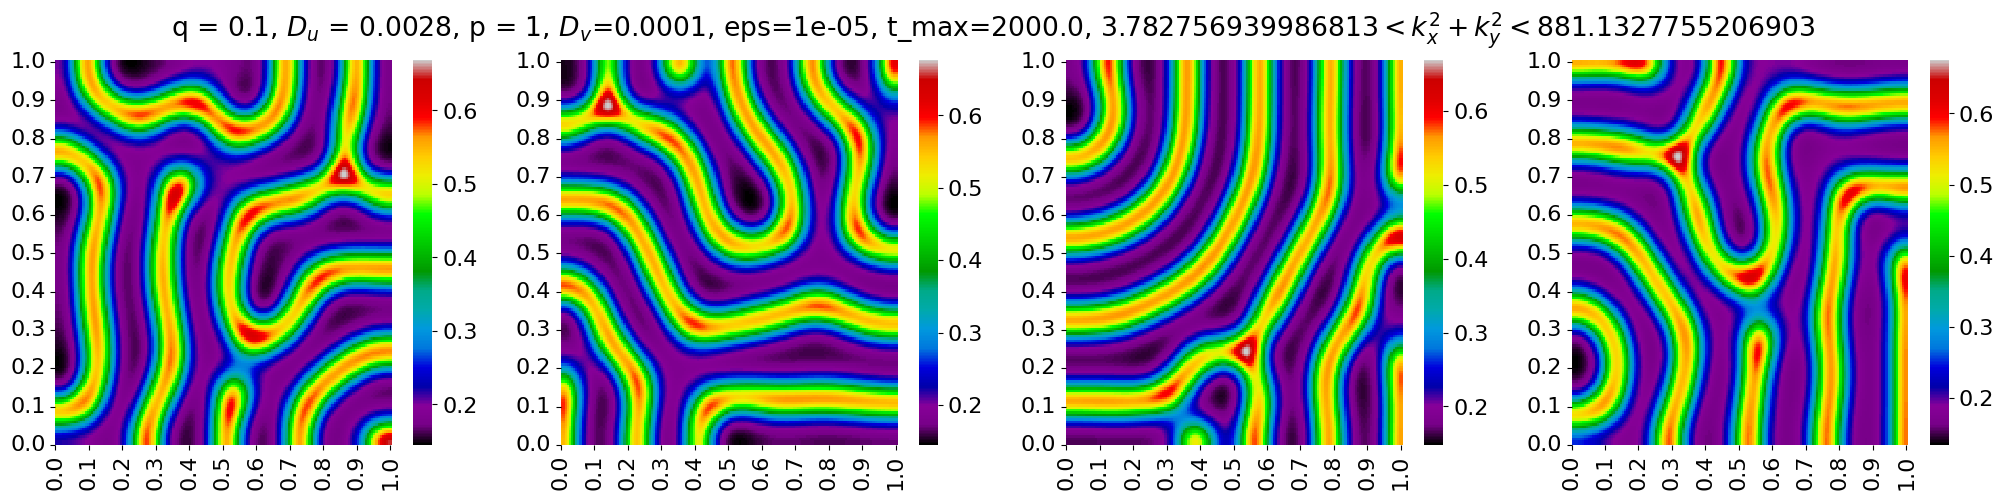

0.1


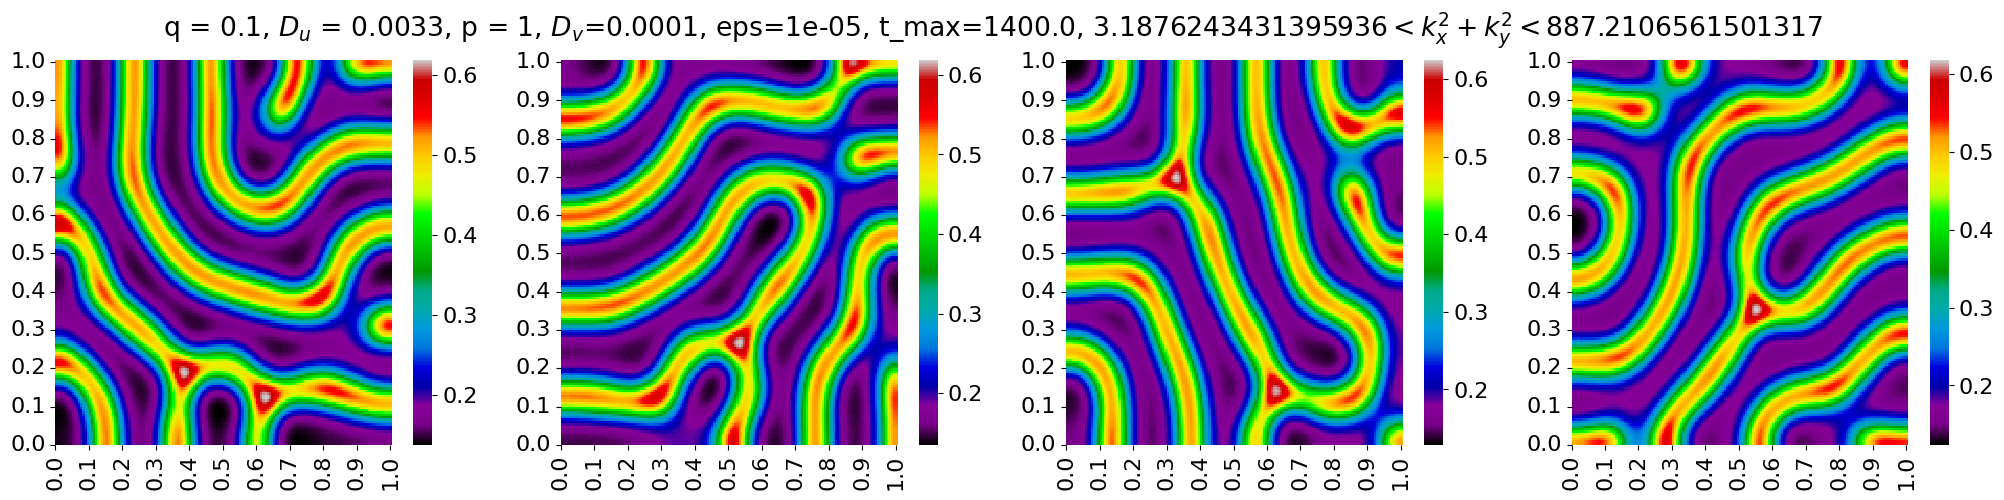

0.1


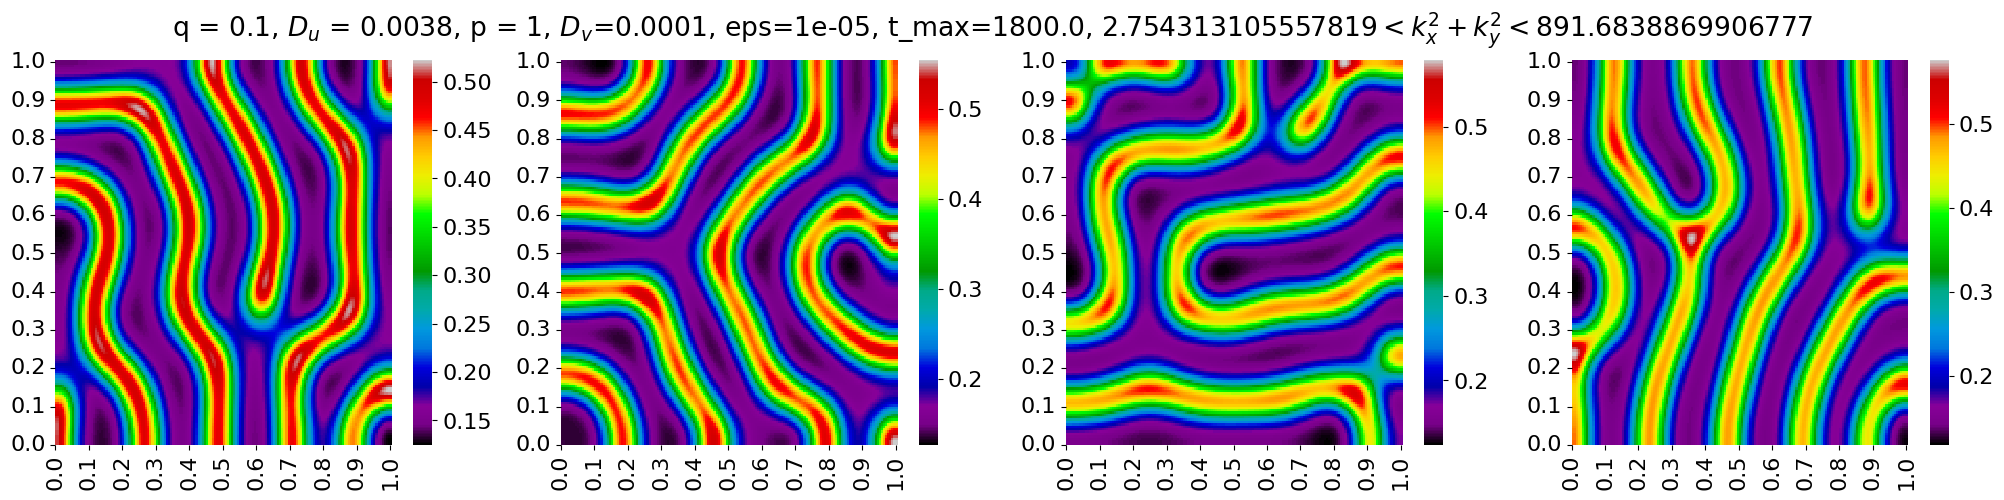

0.1


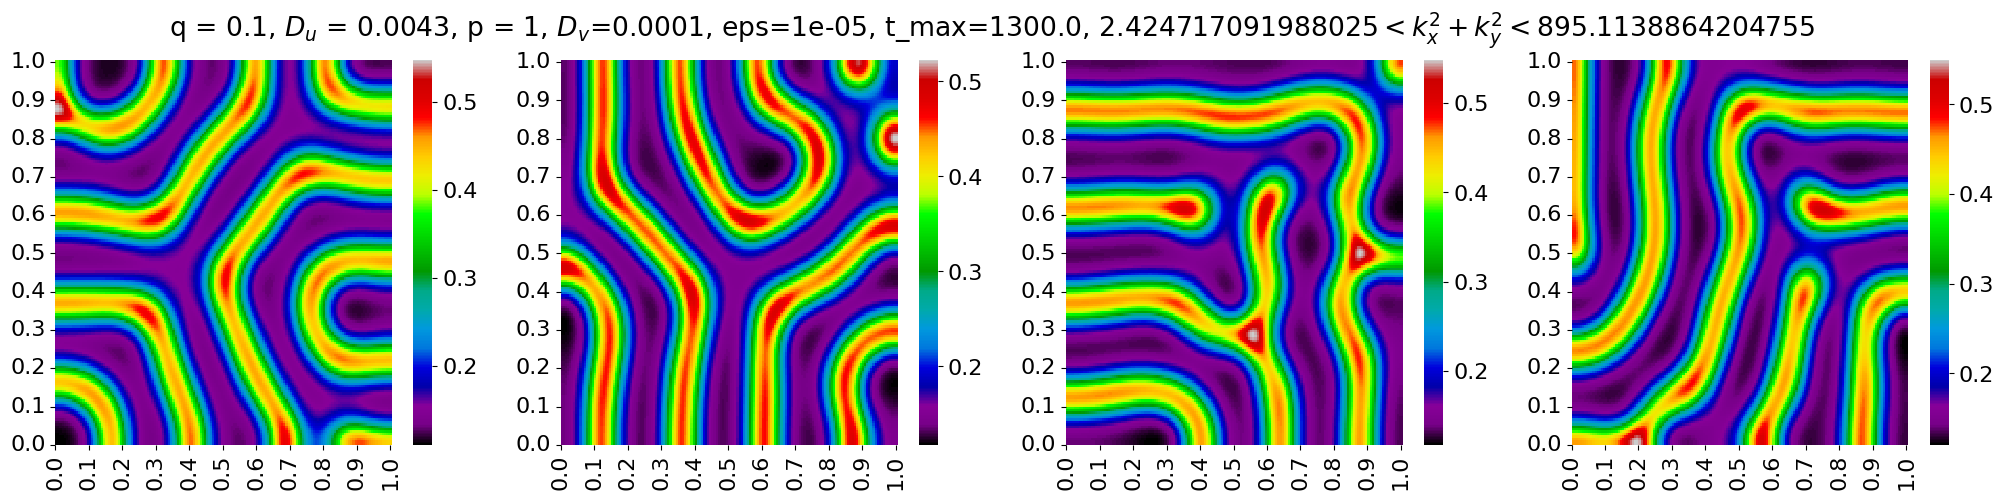

0.1


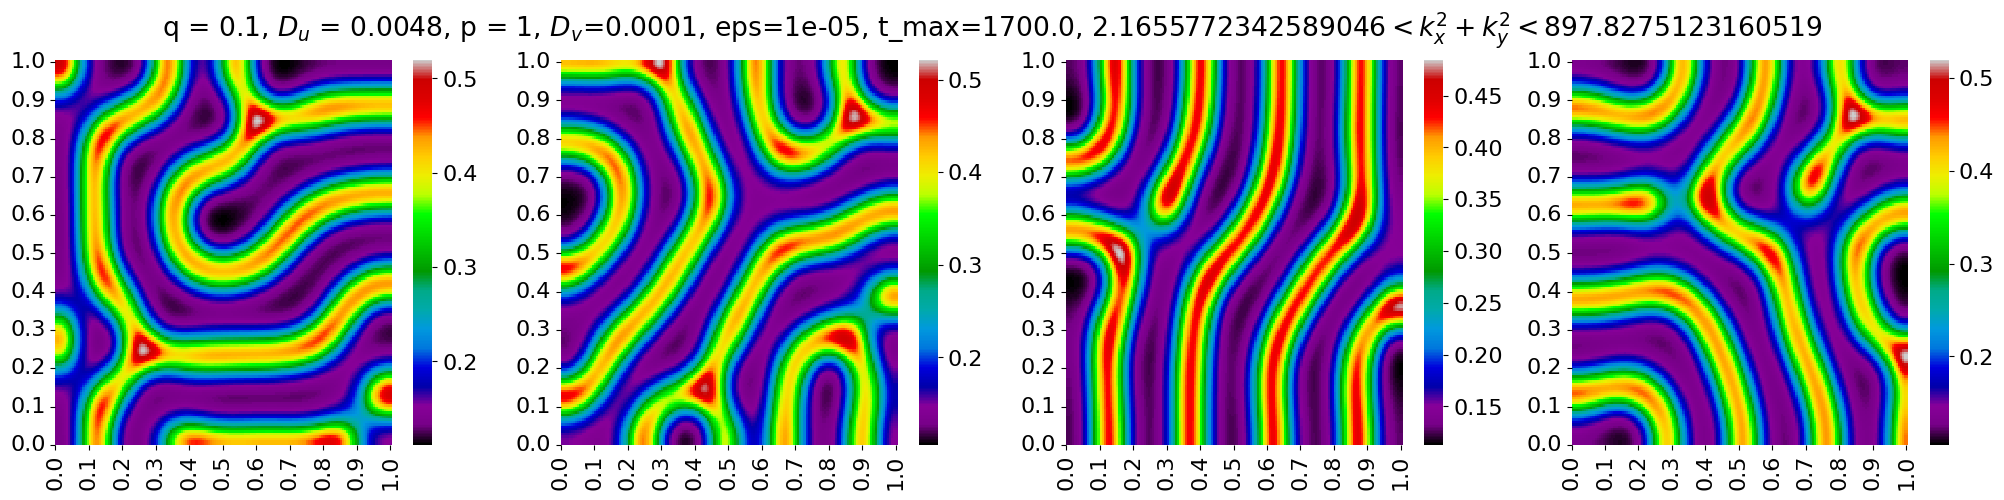

0.1


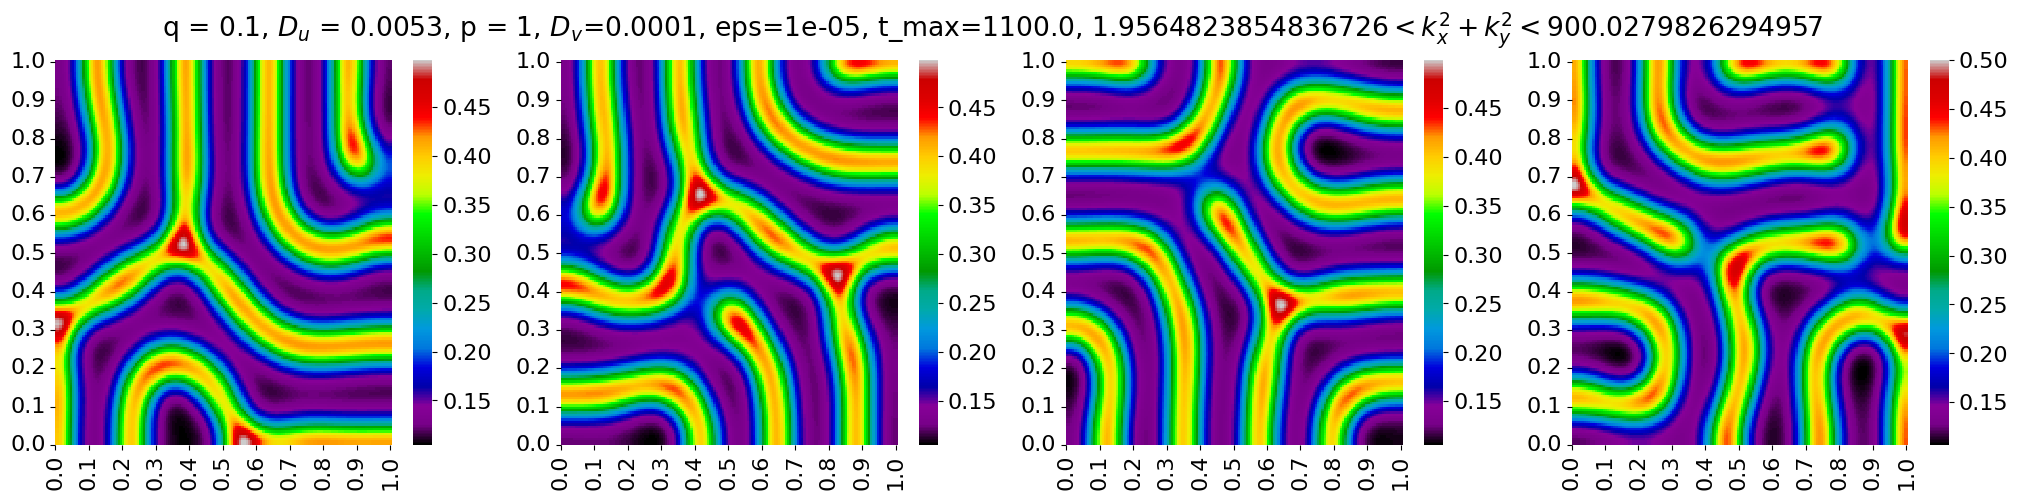

0.1


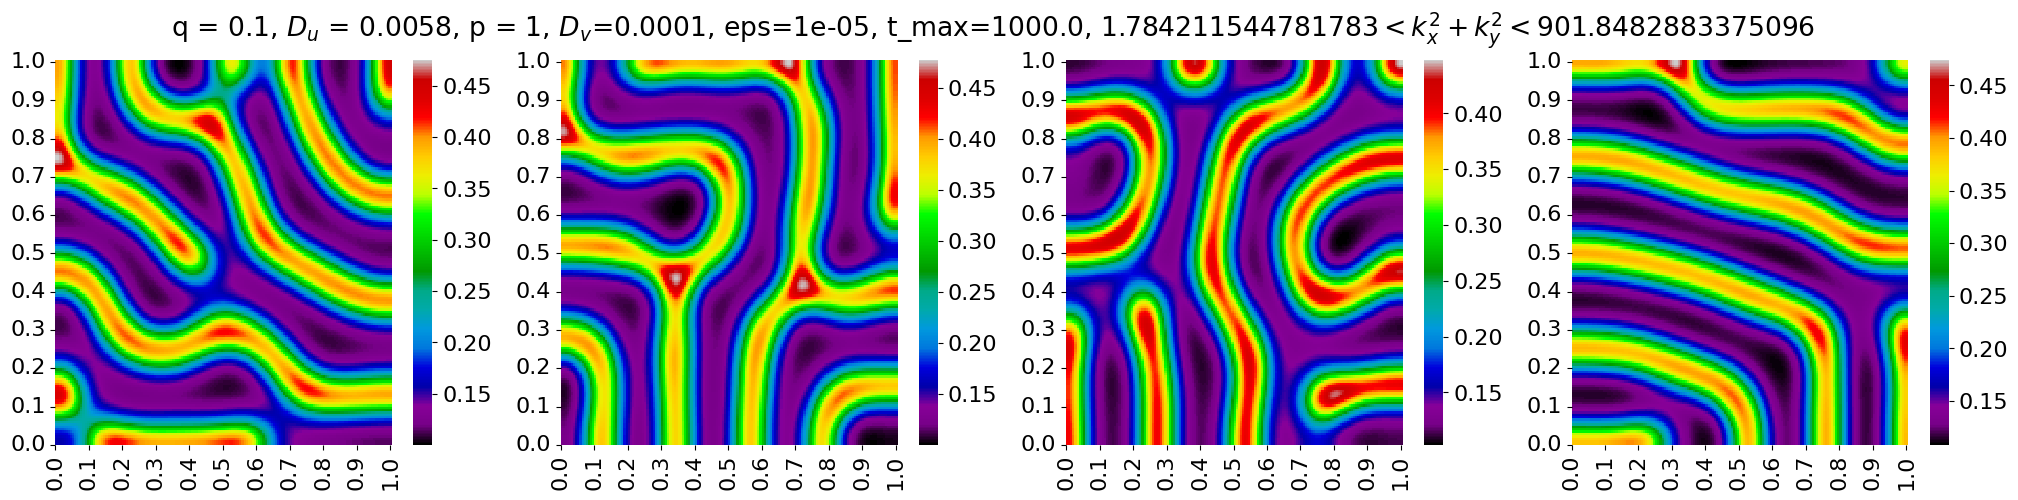

0.1


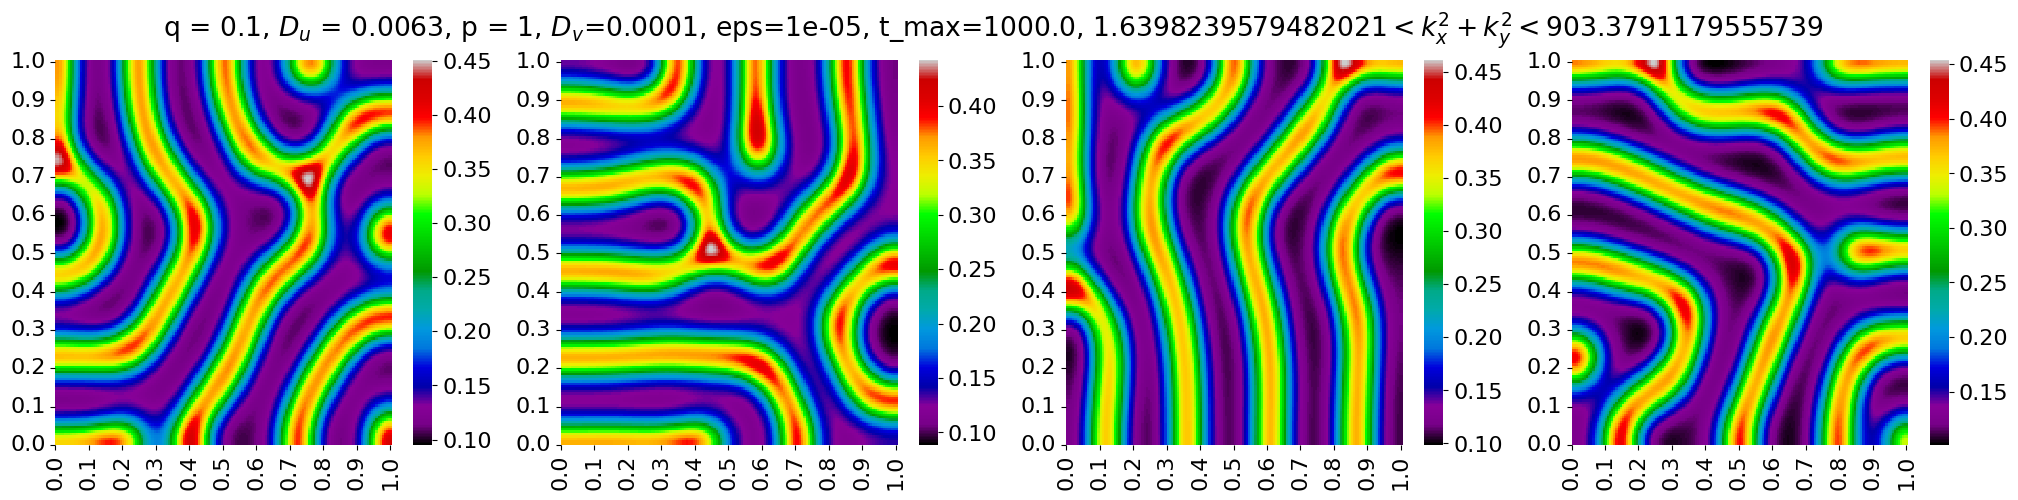

0.1


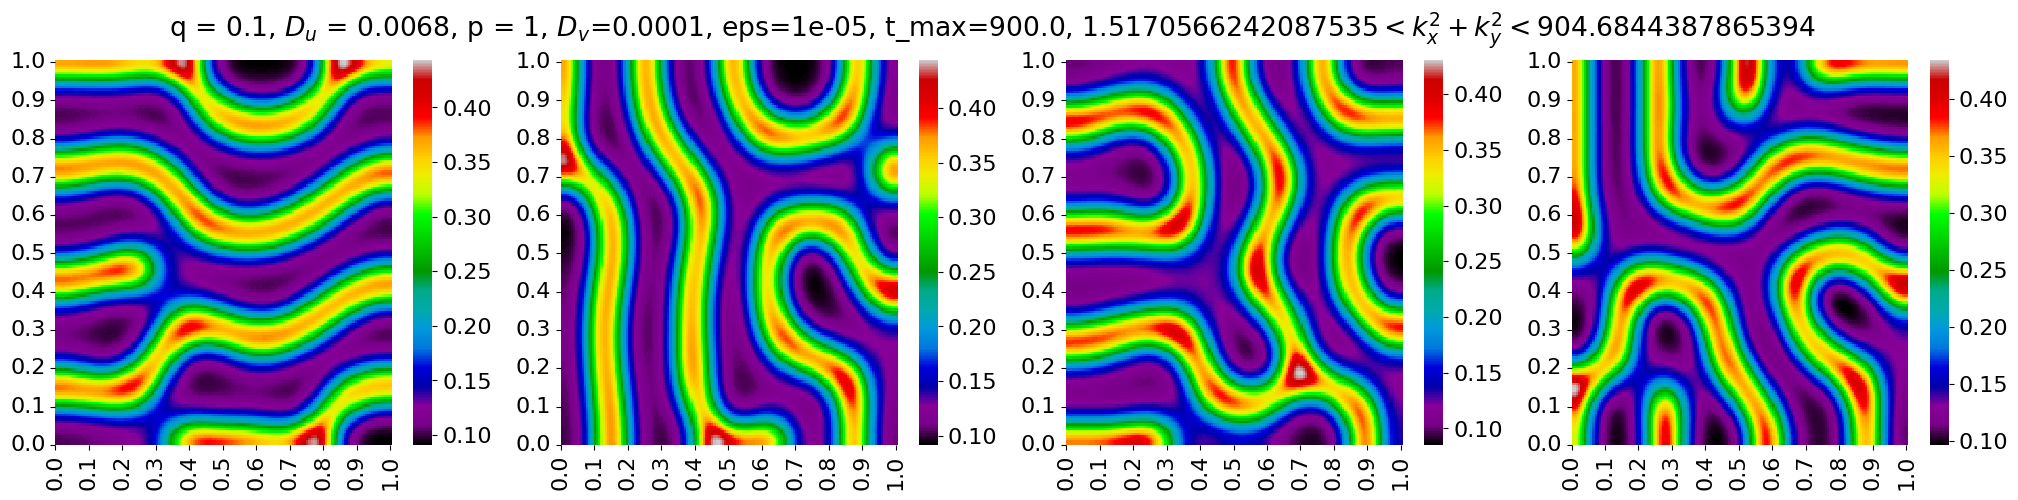

0.1


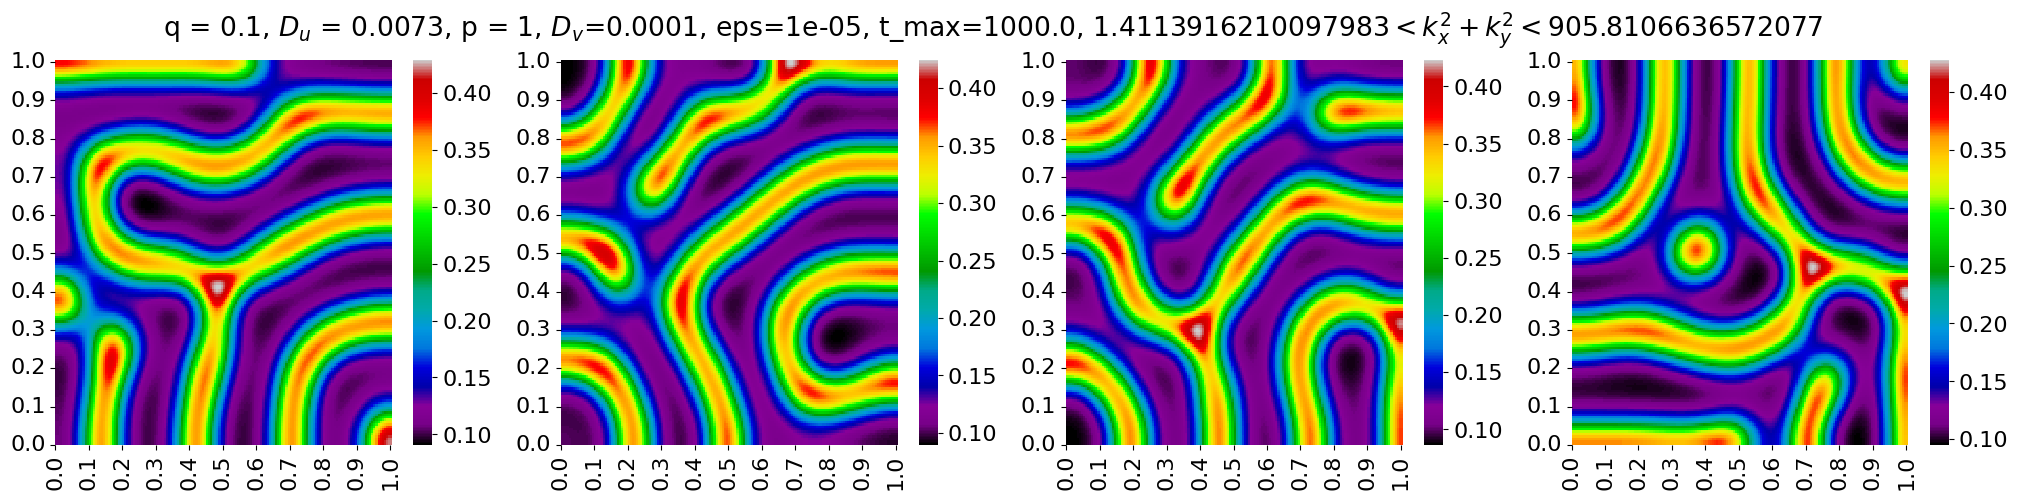

0.1


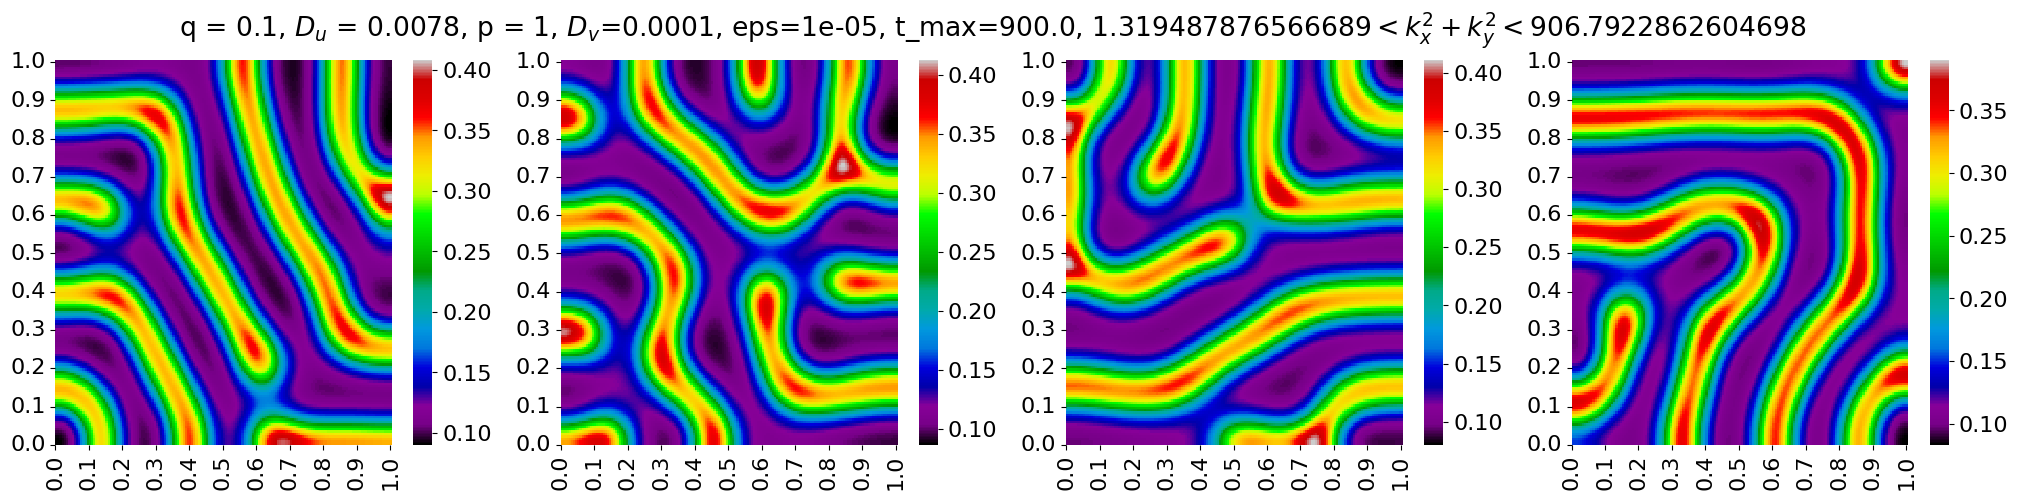

0.1


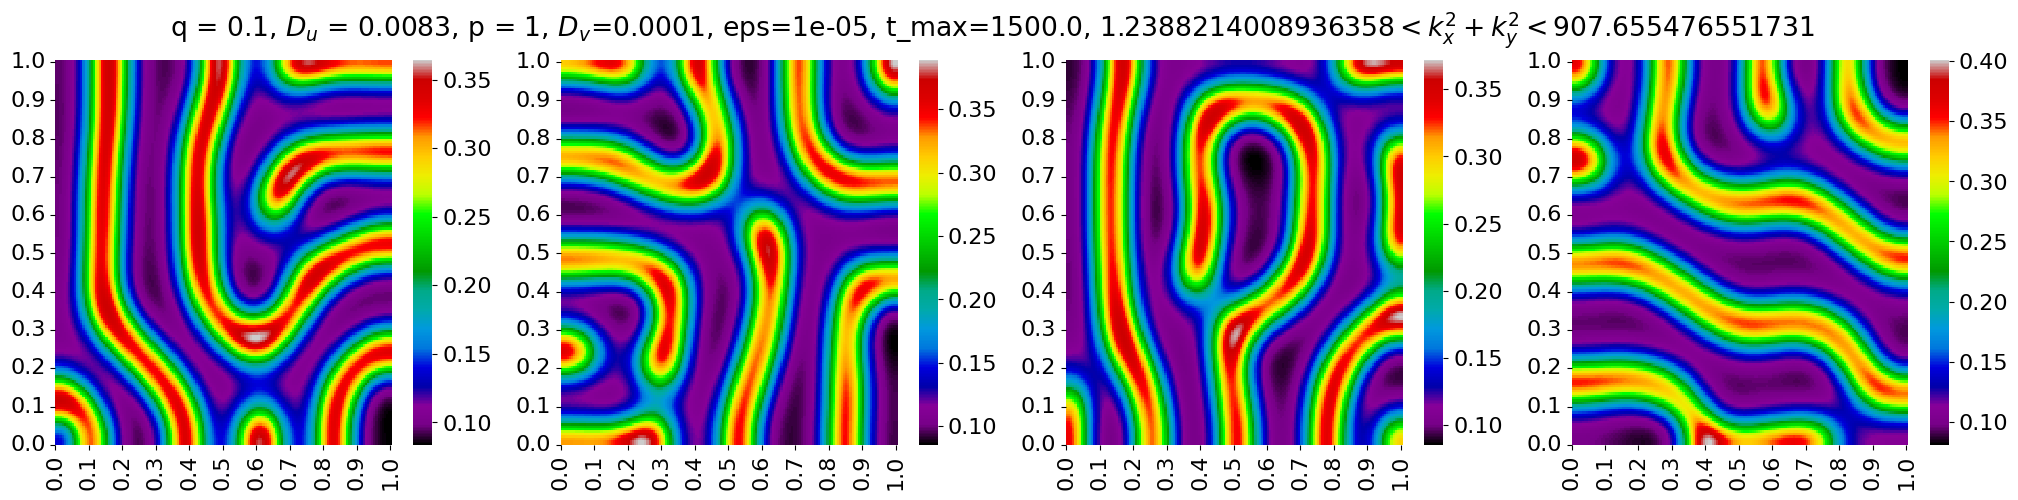

0.1


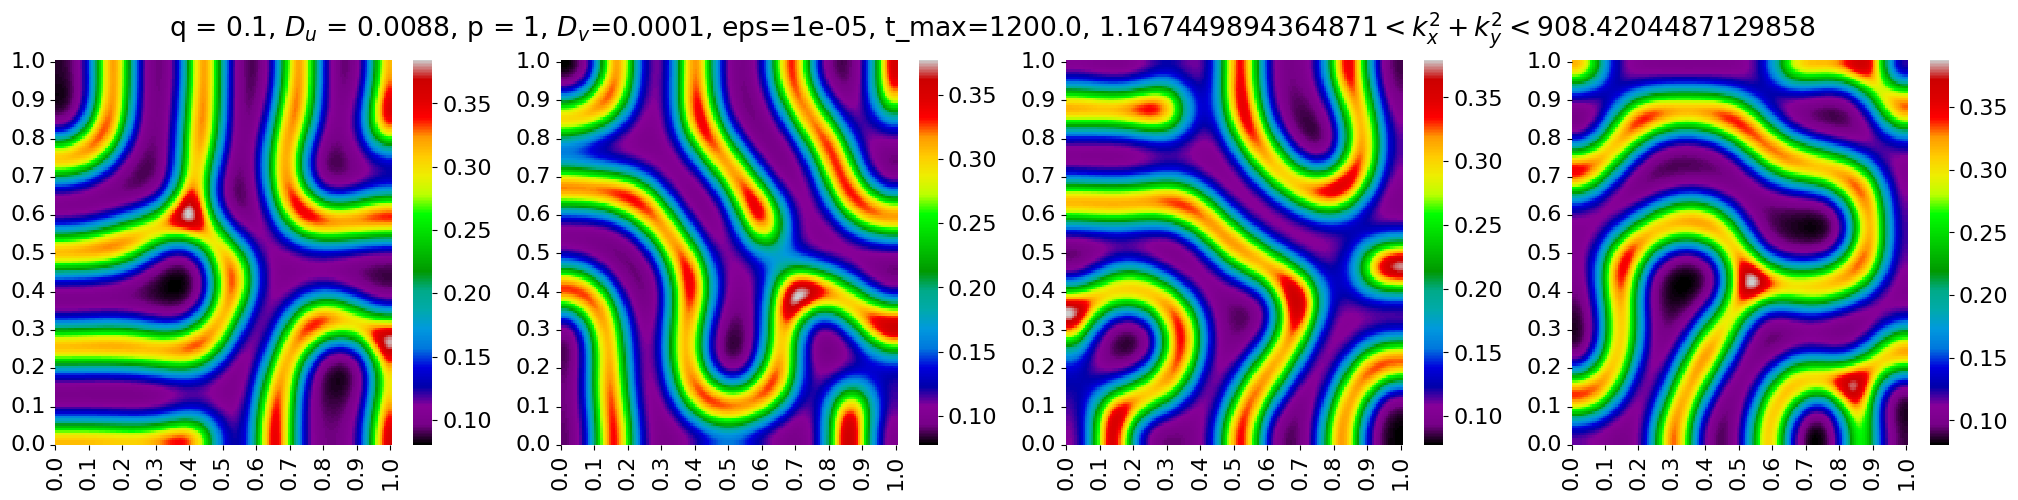

0.1


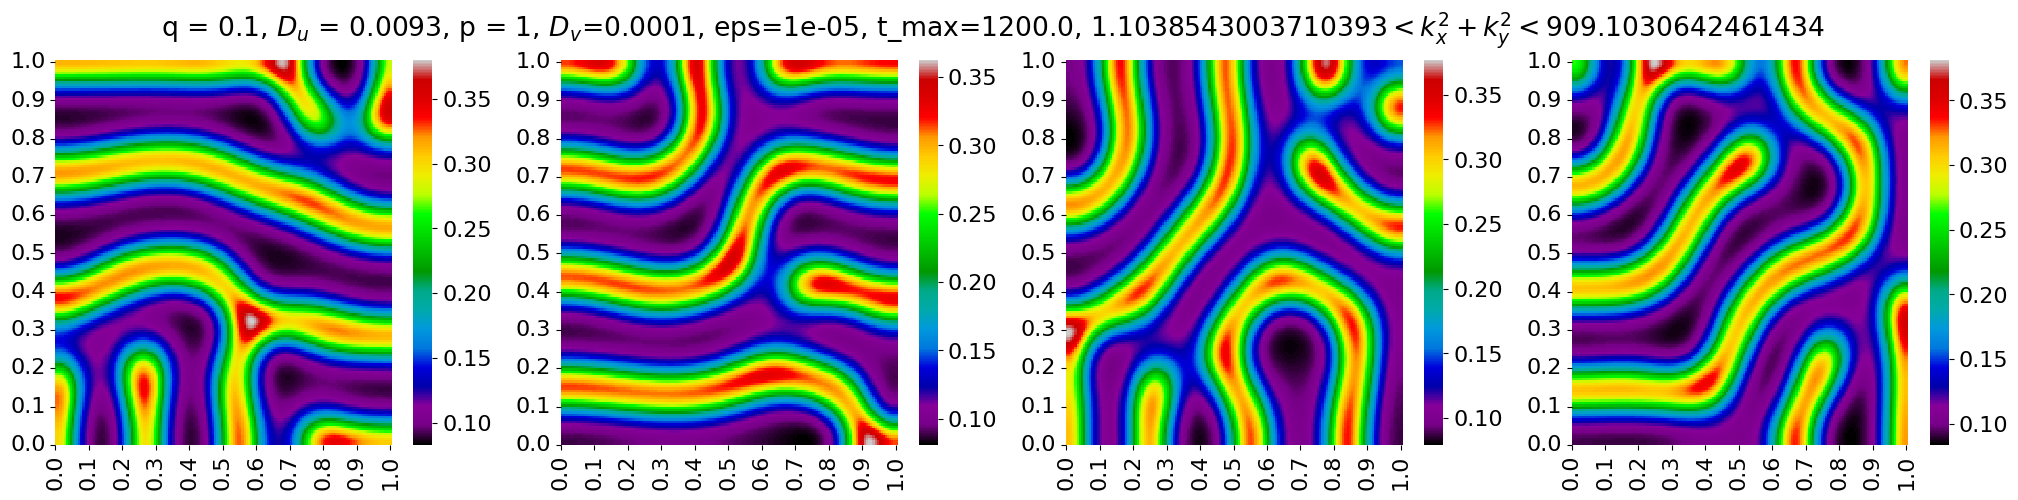

0.1


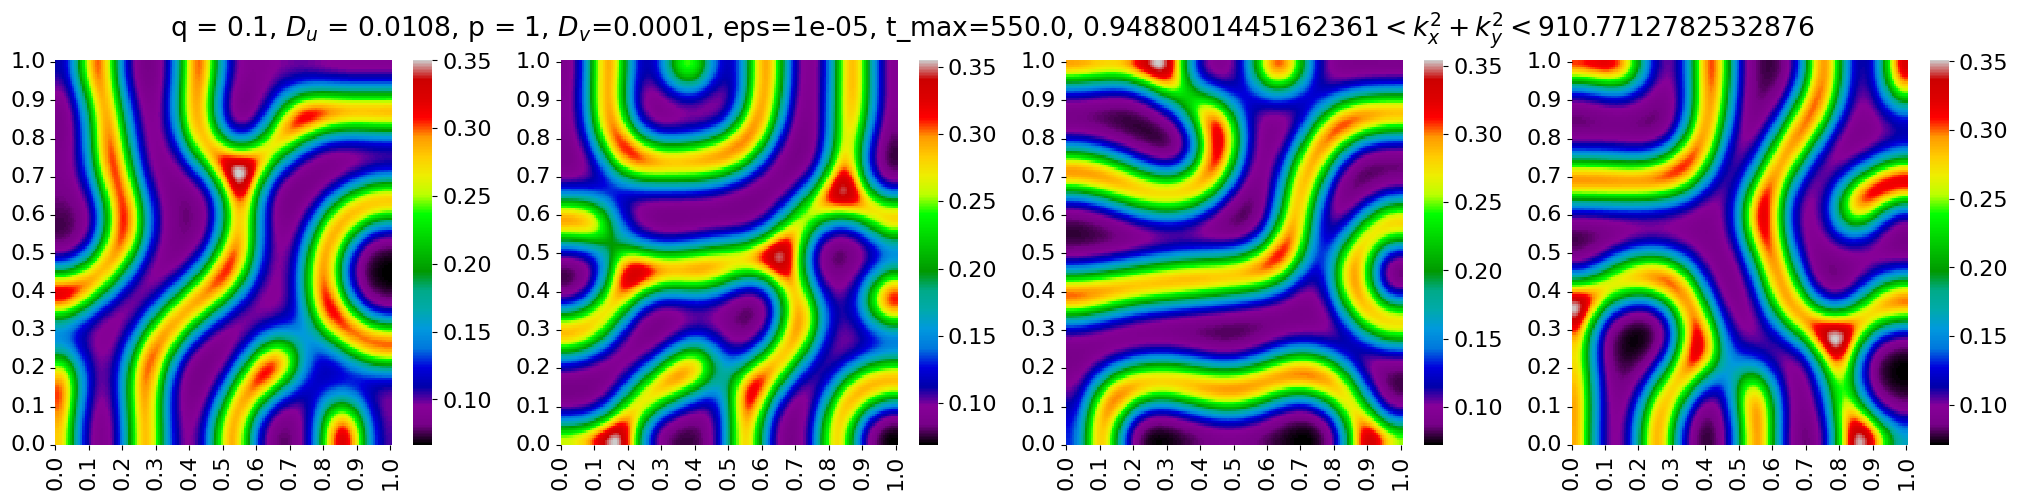

0.1


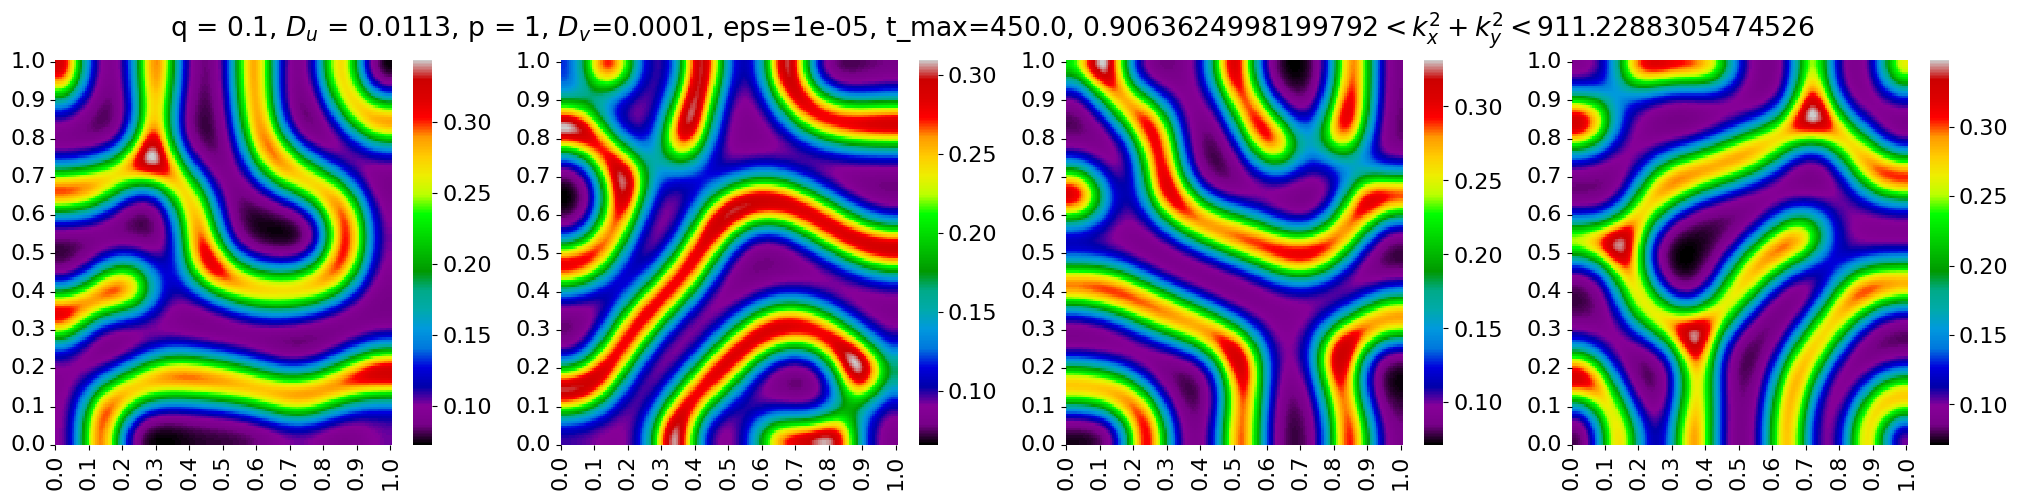

0.1


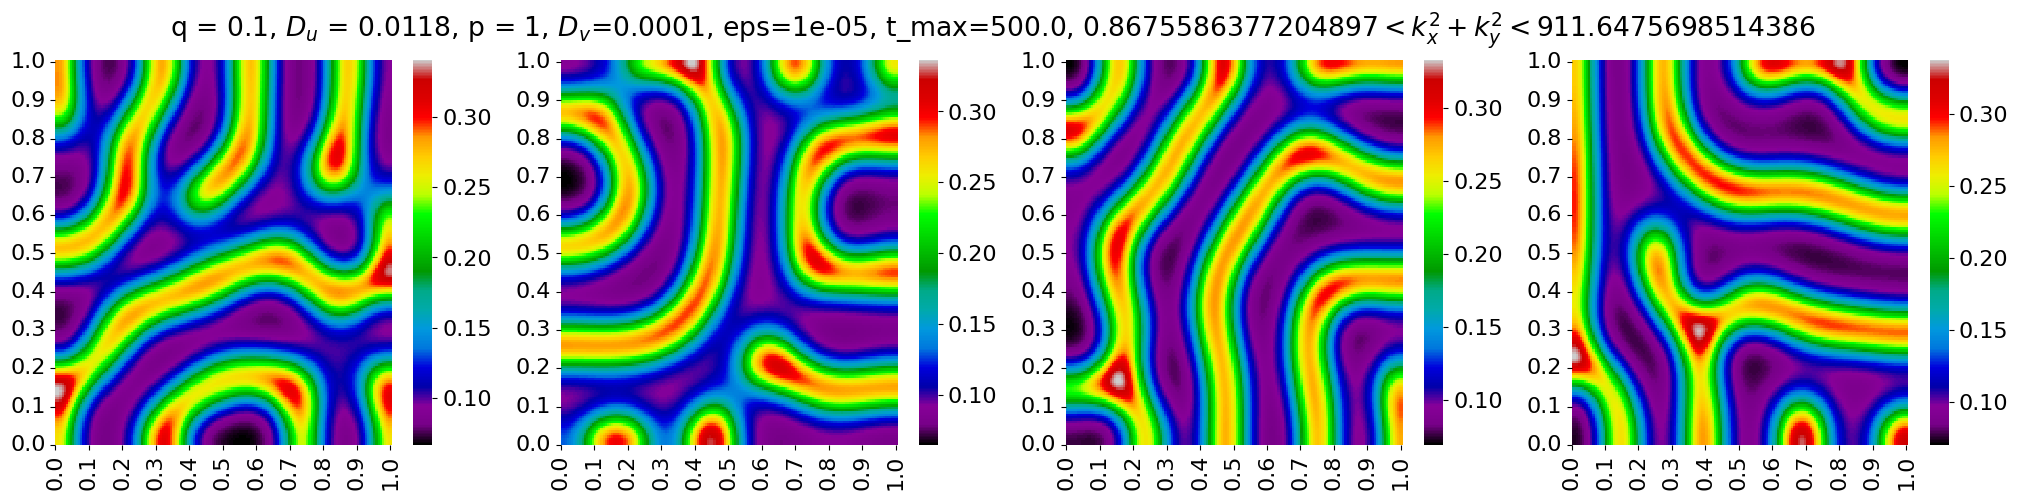

0.1


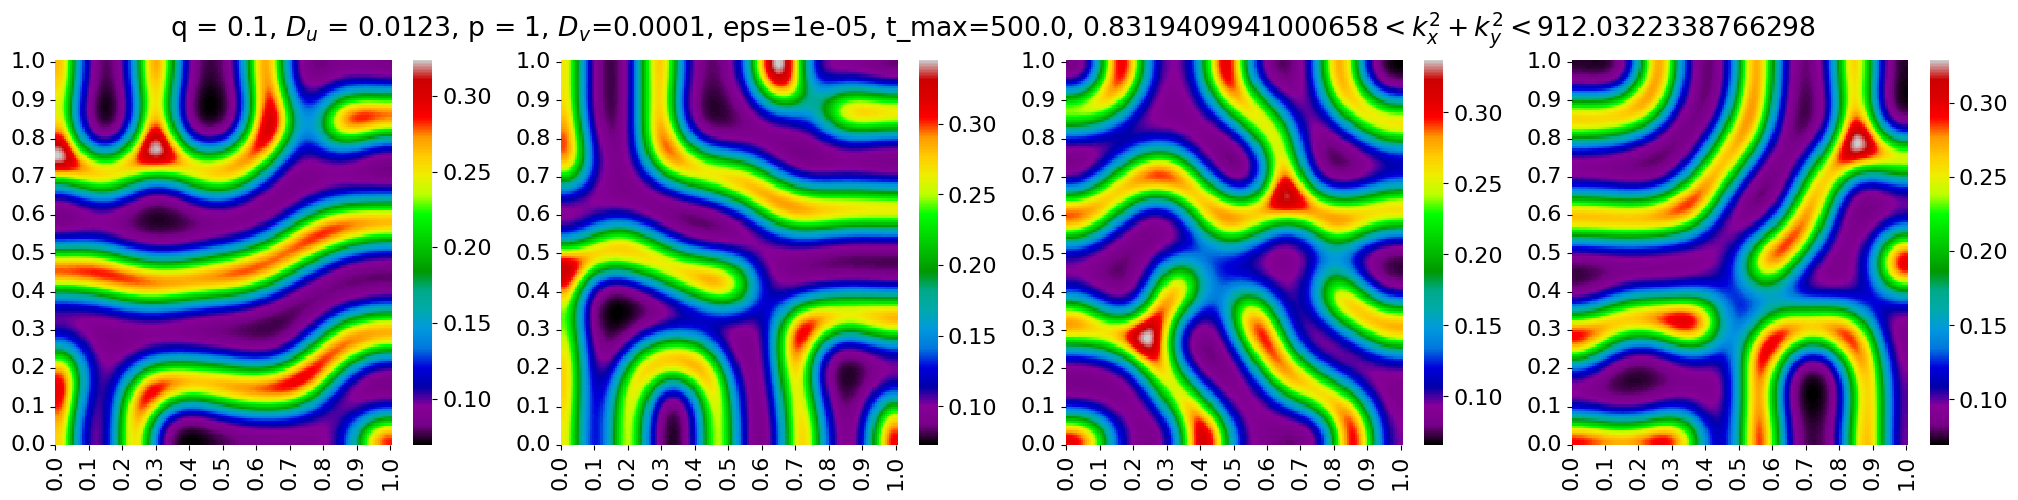

0.1


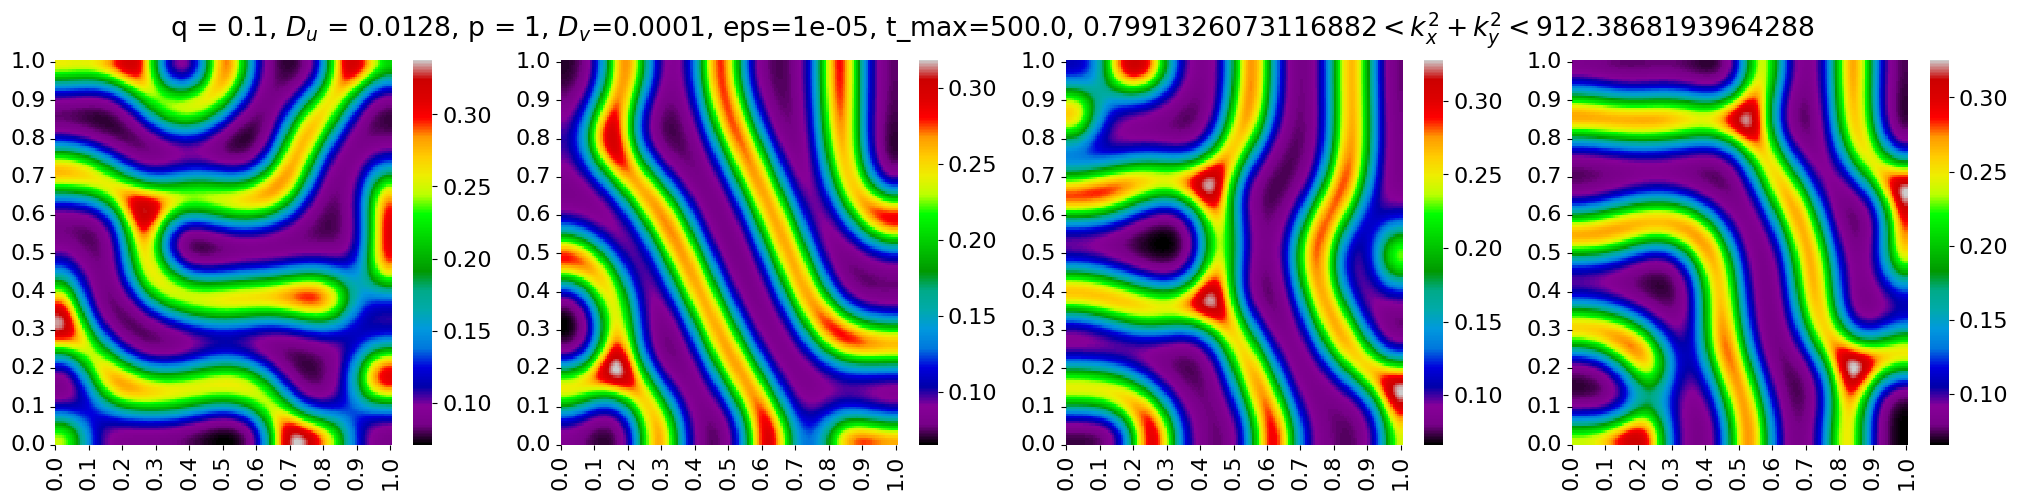

0.1


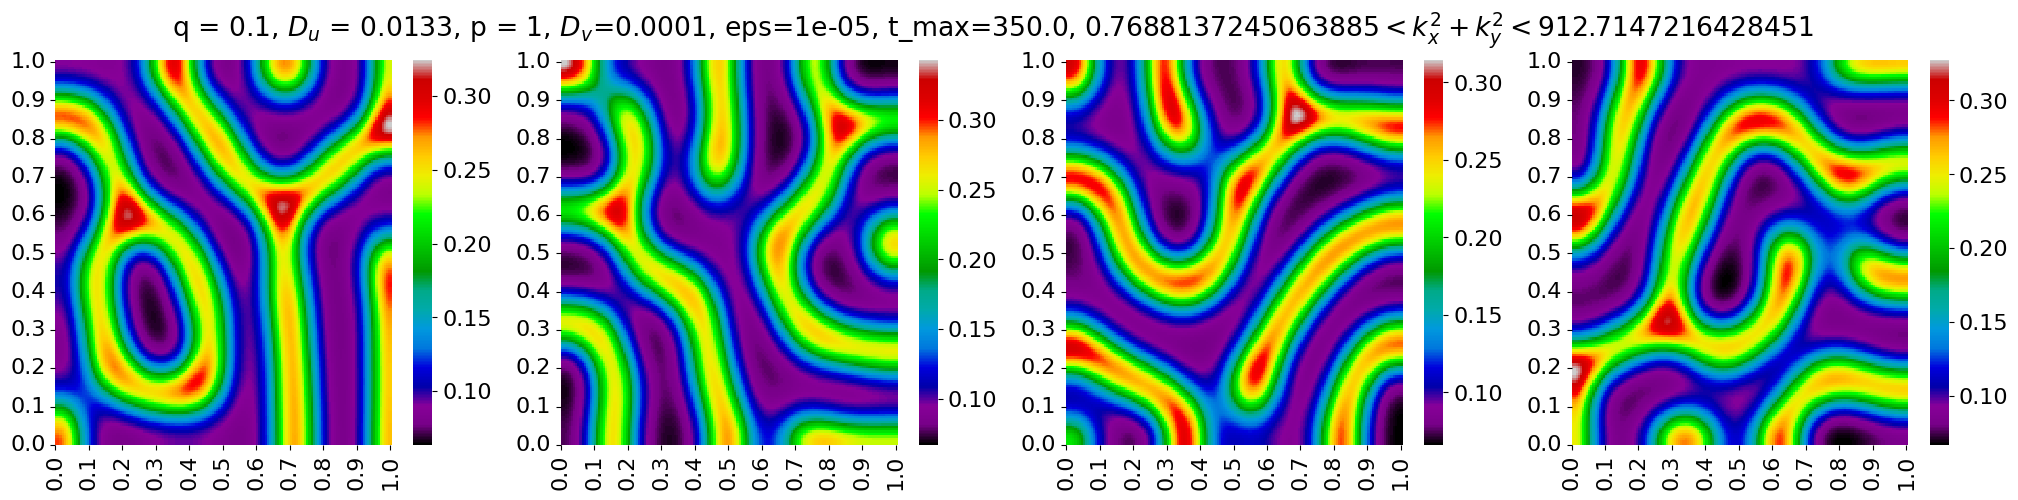

0.1


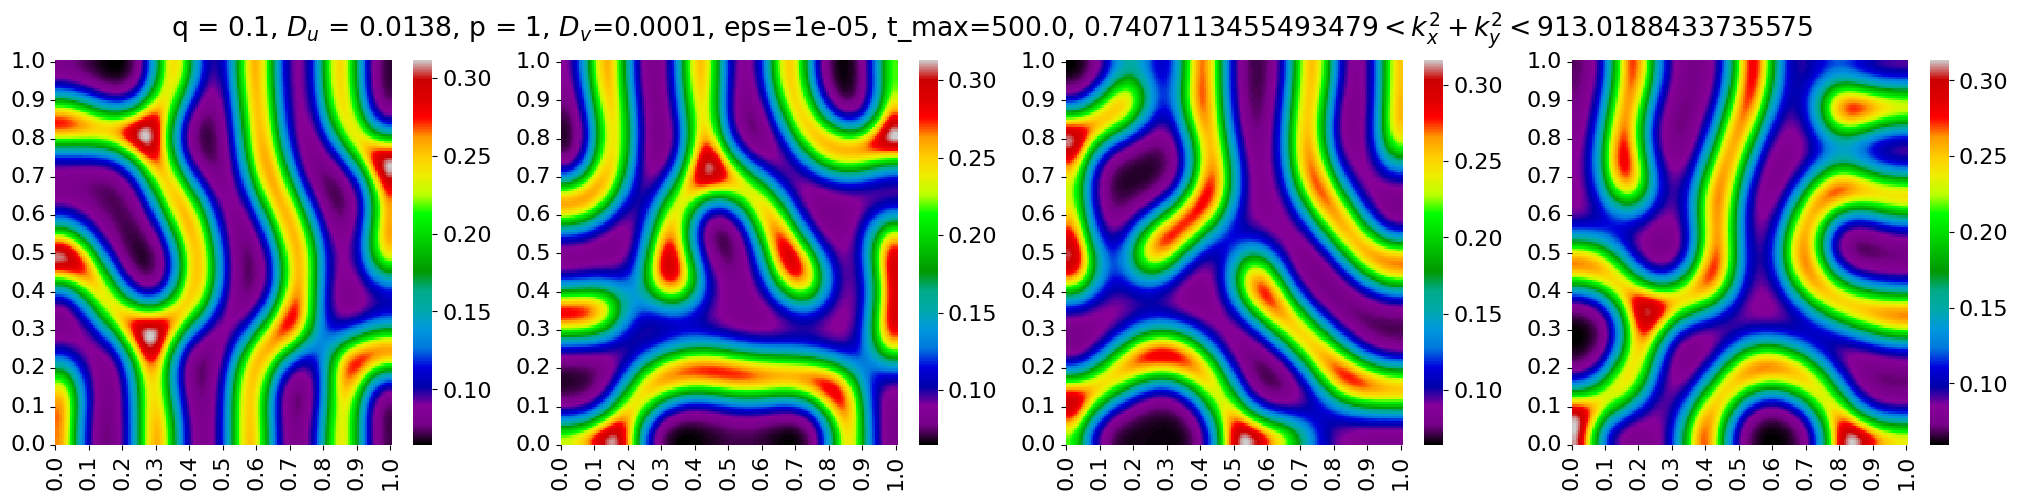

0.1


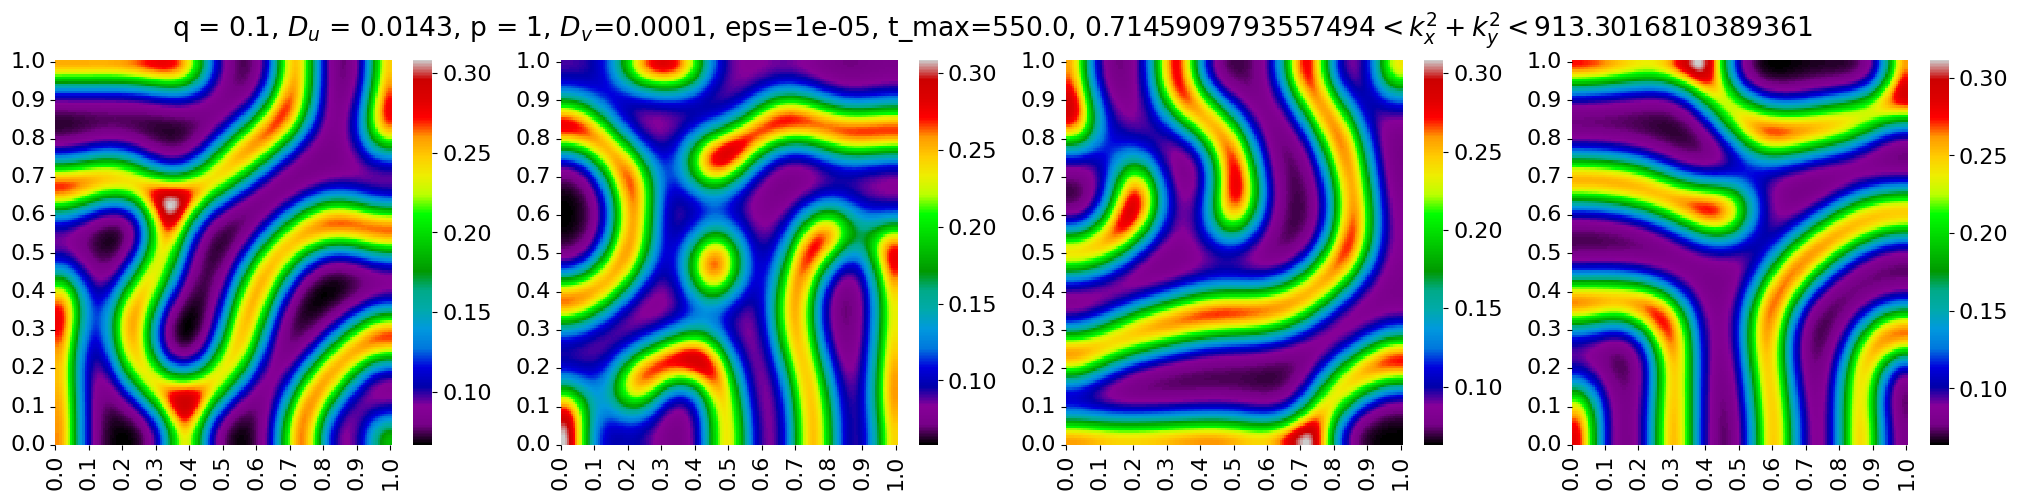

0.1


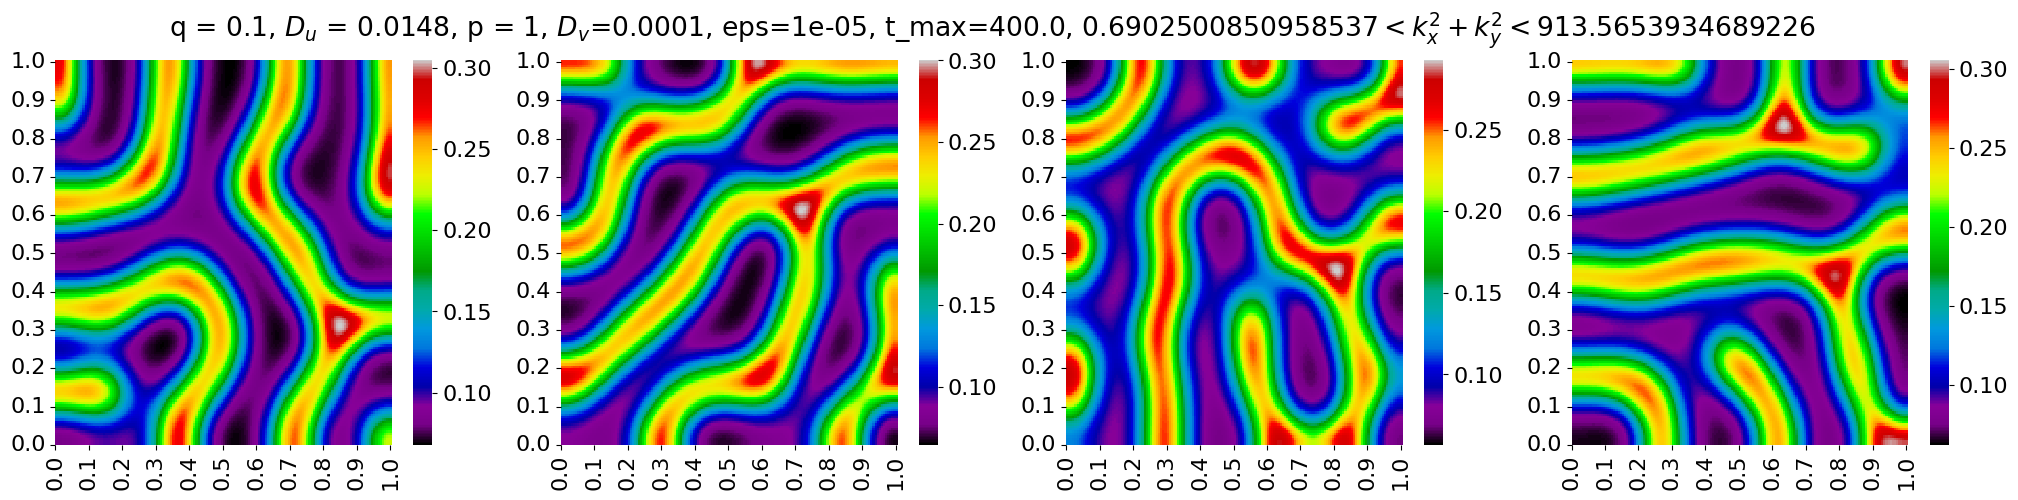

In [58]:
draw_for_q(0.1)